<a href="https://colab.research.google.com/github/alexc6h6/Regression-Model/blob/master/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
!ls '/content/drive/My Drive/house_prices'

train = pd.read_csv('/content/drive/My Drive/house_prices/train.csv', index_col = 'Id')
test = pd.read_csv('/content/drive/My Drive/house_prices/test.csv', index_col = 'Id')

print(train.shape)
print(test.shape)

data_description.txt  sample_submission.csv  test.csv  train.csv
(1460, 80)
(1459, 79)


In [5]:
data = pd.concat([train, test], axis = 0)
print(data.shape)

(2919, 80)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [0]:
#fill missing value
data['BsmtCond'] = data['BsmtCond'].fillna(value = 'None')
data['BsmtExposure'] = data['BsmtExposure'].fillna(value = 'None')
data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(value = 0)
data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(value = 0)
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(value = 'None')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(value = 'None')
data['BsmtFullBath'] = data['BsmtFullBath'].fillna(value = 0)
data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(value = 0)
data['BsmtQual'] = data['BsmtQual'].fillna(value = 'None')
data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(value = 0)
data['Electrical'] = data['Electrical'].fillna(value = 'SBrkr')
data['Exterior1st'] = data['Exterior1st'].fillna(value = 'Other')
data['Exterior2nd'] = data['Exterior2nd'].fillna(value = 'Other')
data['Functional'] = data['Functional'].fillna(value = 'Typ')
data['GarageArea'] = data['GarageArea'].fillna(value = 0)
data['GarageCars'] = data['GarageCars'].fillna(value = 0)
data['GarageCond'] = data['GarageCond'].fillna(value = 'None')
data['GarageFinish'] = data['GarageFinish'].fillna(value = 'None')
data['GarageQual'] = data['GarageQual'].fillna(value = 'None')
data['GarageType'] = data['GarageType'].fillna(value = 'None')
data['KitchenQual'] = data['KitchenQual'].fillna(value = 'TA')
data['LotFrontage'] = data['LotFrontage'].fillna(value = 0)
data['MasVnrArea'] = data['MasVnrArea'].fillna(value = 0)
data['MasVnrType'] = data['MasVnrType'].fillna(value = 'None')
data['SaleType'] = data['SaleType'].fillna(value = 'other')
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(value = 0)
data['totalSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF'] + data['GarageArea'] 
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(value = data['GarageYrBlt'].min())
data['MSZoning'] = data['MSZoning'].fillna(value = 'RL')
data['Utilities'] = data['Utilities'].fillna(value = 'AllPub')
data['Age'] = 2020 - data['YearBuilt']

In [0]:
#drop columns with too much missing values
cols = ['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC']

data.drop(columns = cols, inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [10]:
cols_cat = []
cols_num = []

for col in data.columns:
  if col == 'Id':
    continue
  elif data[col].dtype == 'object':
    cols_cat.append(col)
  else:
    cols_num.append(col)

print(cols_cat)
print(cols_num)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal

In [0]:
level = {'Ex':'Gd', 'Gd': 'Gd', 'TA':'TA', 'Fa':'Fa', 'Po':'Fa', 'None':'None'}
cols_1 = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
          'GarageQual', 'GarageCond']

for col in cols_1:
  data[col] = [level[x] for x in data[col]]

In [0]:
bsmttype = {'GLQ':'GLQ', 'ALQ':'ALQ', 'BLQ':'BLQ', 'Rec':'BLQ', 'LwQ':'BLQ', 'Unf':'Unf', 'None':'None'}
cols_2 = ['BsmtFinType1', 'BsmtFinType2']

for col in cols_2:
  data[col] = [bsmttype[x] for x in data[col]]


In [0]:
condition = {'Artery':'Artery', 'Feedr':'Feedr', 'Norm':'Norm', 'RRNn':'RRAn','RRAn':'RRAn',
             'PosN':'PosA', 'PosA':'PosA', 'RRNe':'RRAe', 'RRAe':'RRAe'}
cols_3 = ['Condition1', 'Condition2']

for col in cols_3:
  data[col] = [condition[x] for x in data[col]]


In [0]:
garage = {'Attchd':'Attchd', 'Detchd':'Detchd', 'BuiltIn':'BuiltIn', 'None':'None',
          '2Types':'other', 'Basment':'other', 'CarPort':'other'}
data['GarageType'] = [garage[x] for x in data['GarageType']]


In [0]:
electrical = {'SBrkr':'SBrkr', 'FuseA':'Mix', 'FuseF':'Mix', 'FuseP':'Mix', 'Mix':'Mix'}
data['Electrical'] = [electrical[x] for x in data['Electrical']]


In [0]:
foundation = {'BrkTil':'BrkTil', 'CBlock':'CBlock', 'PConc':'PConc', 'Slab':'other', 'Stone':'other', 'Wood':'other'}
data['Foundation'] = [foundation[x] for x in data['Foundation']]

In [0]:
functional = {'Typ':'Typ', 'Min1':'other', 'Min2':'other', 'Mod':'other', 'Maj1':'other',
              'Maj2':'other', 'Sev':'other', 'Sal':'other'}
data['Functional'] = [functional[x] for x in data['Functional']]


In [0]:
heating = {'Floor':'other', 'GasA':'Gas', 'GasW':'Gas', 'Grav':'other', 'OthW':'other', 'Wall':'other'}
data['Heating'] = [heating[x] for x in data['Heating']]


In [0]:
slope = {'Gtl':'Gtl', 'Mod':'Mod', 'Sev':'Mod'}
data['LandSlope'] = [slope[x] for x in data['LandSlope']]

In [0]:
housestyle = {'1Story':'1F', '1.5Fin':'1F', '1.5Unf':'1F', '2Story':'2F', '2.5Fin':'2F', 
              '2.5Unf':'2F', 'SFoyer':'split', 'SLvl':'split'}
data['HouseStyle'] = [housestyle[x] for x in data['HouseStyle']]

In [0]:
LotConfig = {'Inside':'Inside', 'Corner':'Corner', 'FR2':'Corner', 'CulDSac':'CulDSac', 'FR3':'CulDSac'}
data['LotConfig'] = [LotConfig[x] for x in data['LotConfig']]

In [0]:
Lotshape = {'Reg':'Reg', 'IR1':'IR', 'IR2':'IR', 'IR3':'IR'}
data['LotShape'] = [Lotshape[x] for x in data['LotShape']]

In [0]:
zoning = {'RL':'RL', 'RM':'RH', 'RH':'RH', 'FV':'FV', 'C (all)':'C'}
data['MSZoning'] = [zoning[x] for x in data['MSZoning']]

In [0]:
MasVnrType = {'BrkCmn':'BrkFace', 'BrkFace':'BrkFace', 'None':'None', 'Stone':'Stone'}
data['MasVnrType'] = [MasVnrType[x] for x in data['MasVnrType']]

In [0]:
pavedrive = {'Y':'Y', 'P':'Y', 'N':'N'}
data['PavedDrive'] = [pavedrive[x] for x in data['PavedDrive']]

In [0]:
RoofMatl = {'CompShg':'CompShg', 'ClyTile':'other', 'Membran':'other', 'Metal':'other',
            'Roll':'other', 'Tar&Grv':'other', 'WdShake':'other', 'WdShngl':'other'}
data['RoofMatl'] = [RoofMatl[x] for x in data['RoofMatl']]

In [0]:
roofstyle = {'Flat':'other', 'Gable':'Gable', 'Gambrel':'other', 'Hip':'Hip', 
             'Mansard':'other', 'Shed':'other'}
data['RoofStyle'] = [roofstyle[x] for x in data['RoofStyle']]

In [0]:
salestype = {'WD':'WD', 'CWD':'WD', 'VWD':'WD', 'New':'New', 'COD':'other', 
             'Con':'Con', 'ConLw':'Con', 'ConLI':'Con', 'ConLD':'Con', 'Oth':'other', 'other':'other'}
data['SaleType'] = [salestype[x] for x in data['SaleType']]

In [0]:
salescondition = {'Normal':'Normal', 'Abnorml':'Abnorml', 'AdjLand':'other',
                  'Alloca':'other', 'Family':'other', 'Partial':'other'}
data['SaleCondition'] = [salescondition[x] for x in data['SaleCondition']]

In [0]:
BldgType = {'1Fam':'1Fam', '2fmCon':'1Fam', 'Duplex':'Duplex', 'TwnhsE':'Twnhs', 'Twnhs':'Twnhs'}

data['BldgType'] = [BldgType[x] for x in data['BldgType']]

In [0]:
exterior = {'VinylSd':'VinylSd', 'MetalSd':'MetalSd', 'Wd Sdng':'Wd', 'WdShing':'Wd',
            'Wd Shng':'Wd', 'Brk Cmn':'Brk', 
            'HdBoard':'HdBoard', 'BrkComm':'Brk', 'BrkFace':'Brk', 'CmentBd': 'CemntBd', 'CemntBd':'CemntBd',
            'Plywood':'Wd', 'AsbShng':'Asb', 'Stucco':'Stucco', 'ImStucc':'Stucco',
            'AsphShn':'other', 'Stone':'other', 'CBlock':'other', 'Other':'other'}

cols_4 = ['Exterior1st', 'Exterior2nd']
for col in cols_4:
  data[col] = [exterior[x] for x in data[col]]

In [0]:
neighbor = {'NoRidge':'NoRidge', 'NridgHt':'NoRidge', 'StoneBr':'NoRidge', 'NAmes':'NAmes', 'BrDale':'NAmes',
            'Blmngtn':'Blmngtn', 'Somerst':'Somerst', 'Veenker':'Somerst', 'ClearCr':'Somerst',
            'NWAmes':'NWAmes', 'Sawyer':'NWAmes', 'SawyerW':'NWAmes', 'Crawfor':'Crawfor', 'OldTown':'OldTown',
            'BrkSide':'BrkSide','Mitchel':'Mitchel', 'MeadowV':'Mitchel', 'Blueste':'SWISU', 'SWISU':'SWISU',
            'CollgCr':'CollgCr','Edwards':'Edwards', 'Timber':'Timber', 'IDOTRR':'OldTown','Gilbert':'Gilbert',
            'NPkVill':'NAmes'}

data['Neighborhood'] = [neighbor[x] for x in data['Neighborhood']]

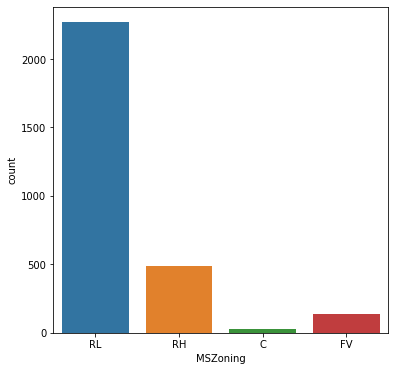

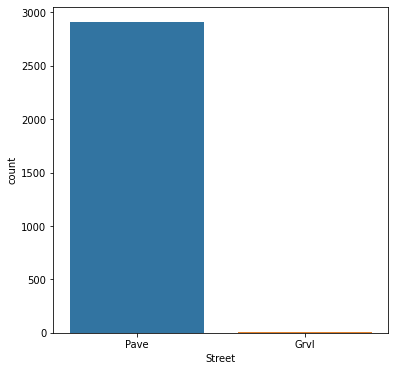

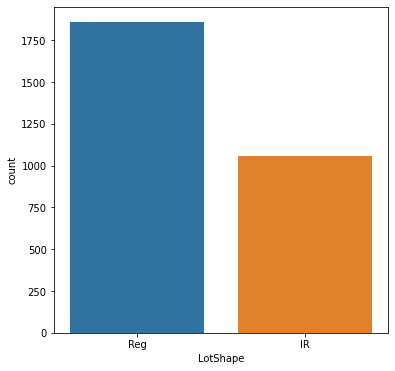

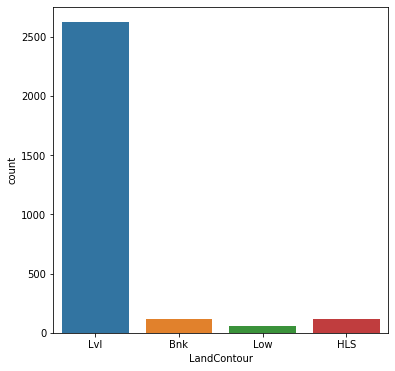

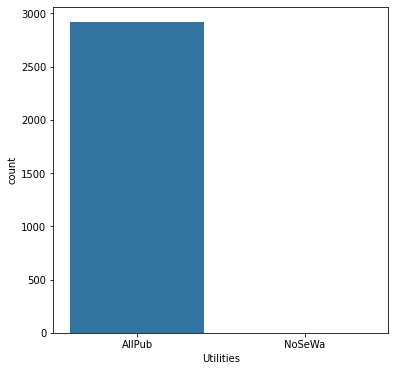

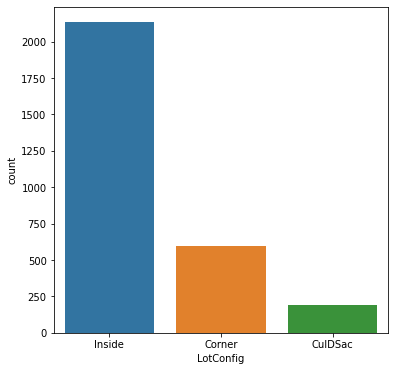

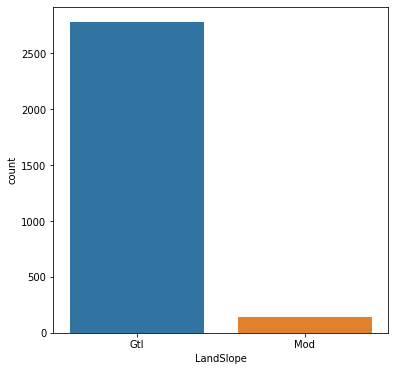

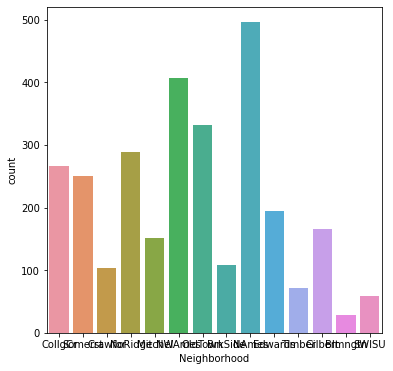

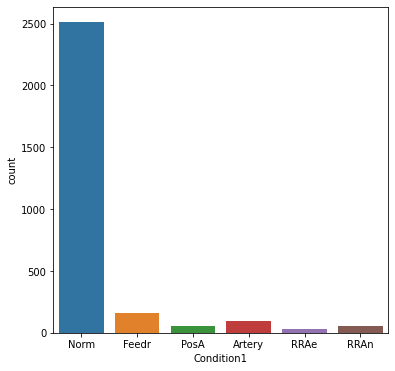

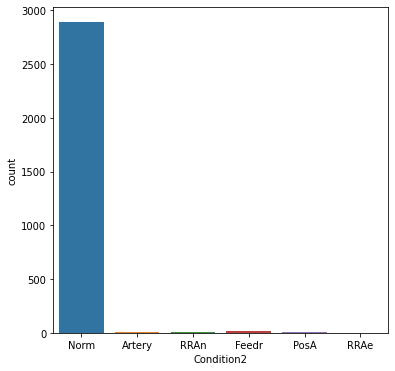

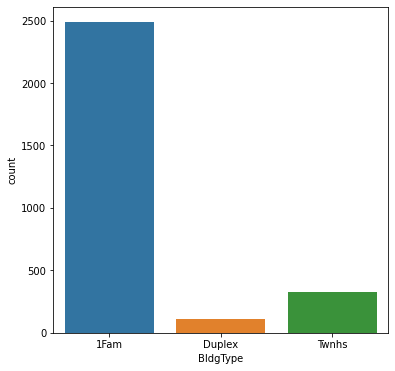

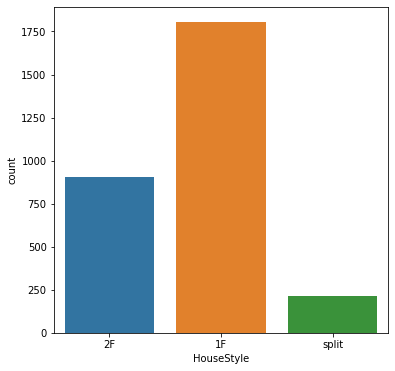

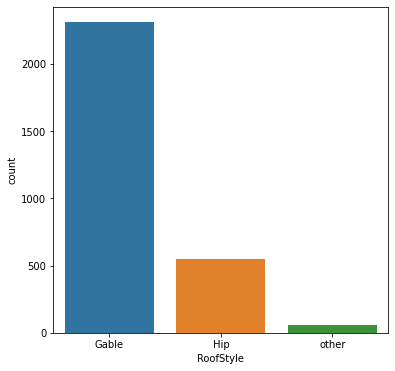

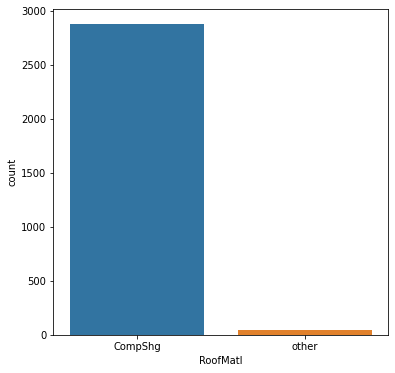

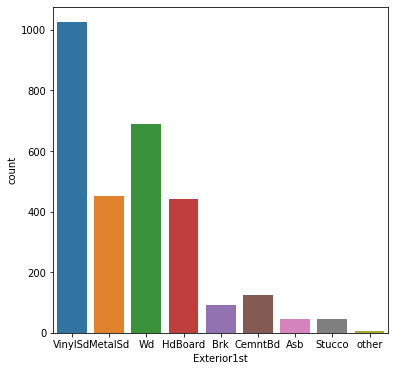

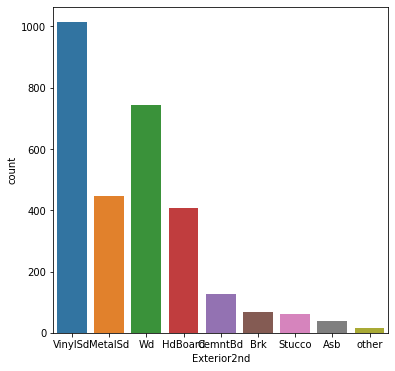

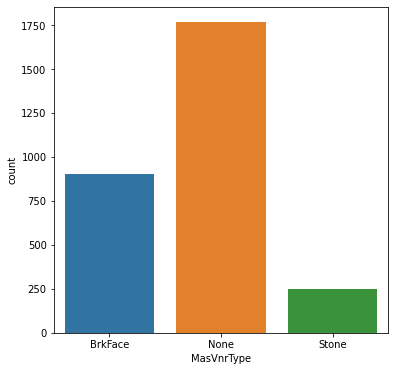

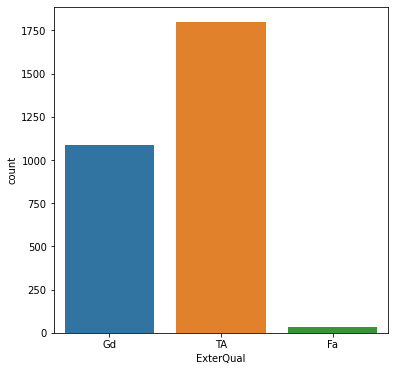

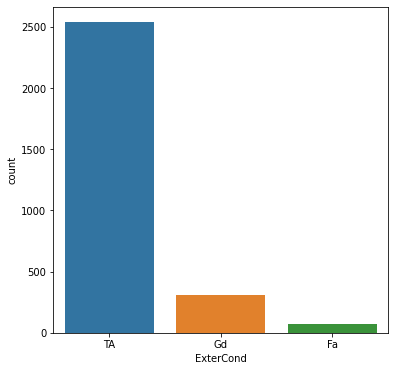

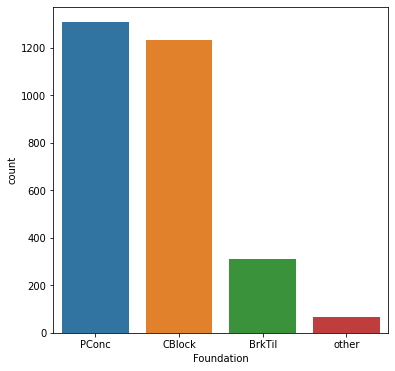

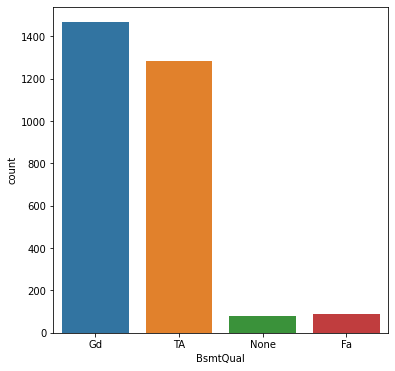

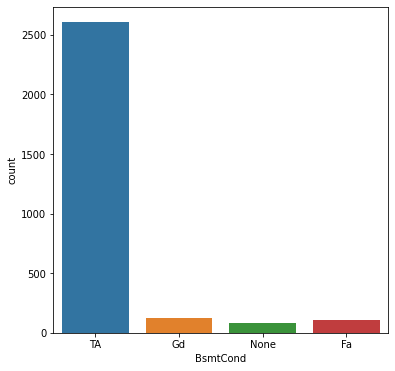

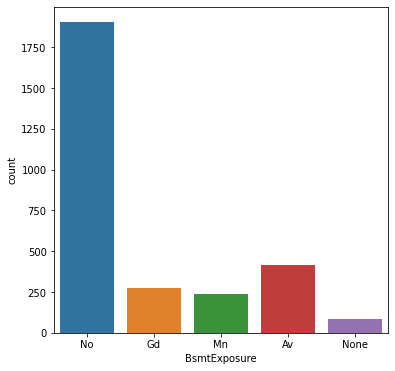

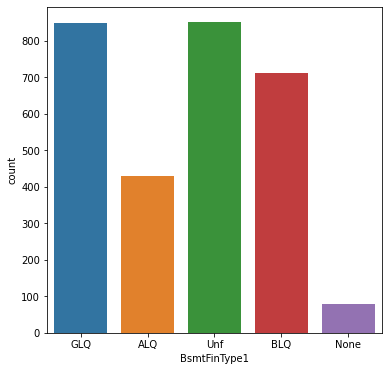

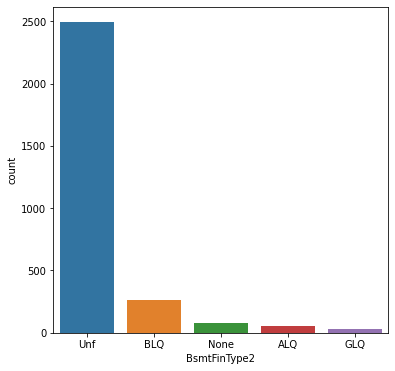

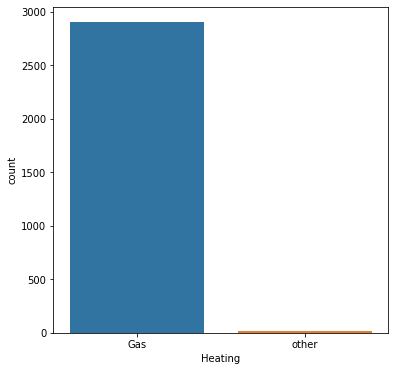

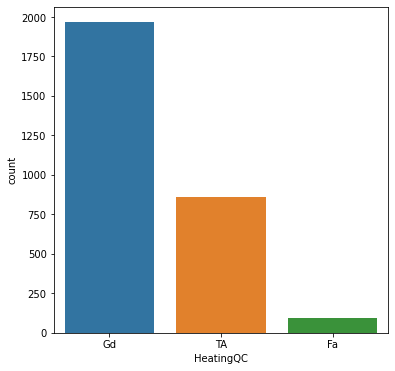

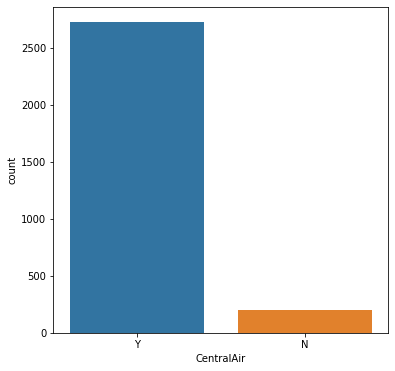

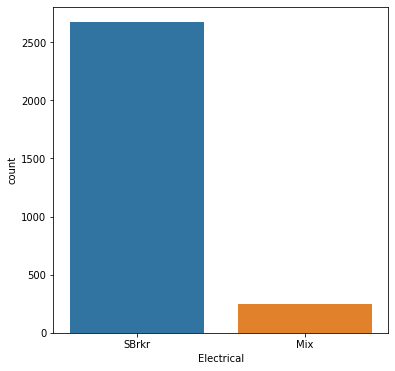

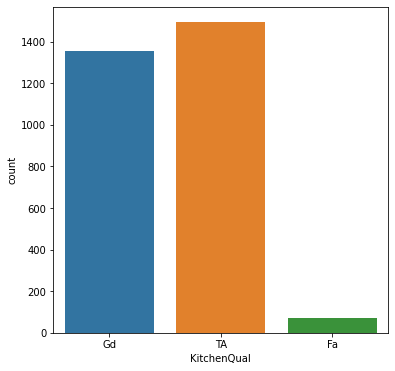

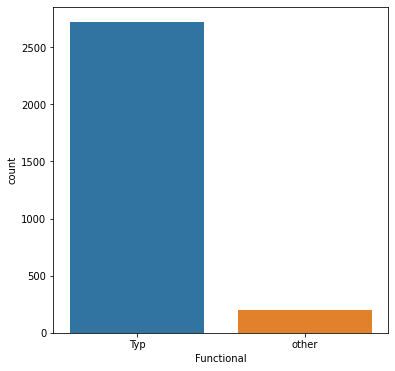

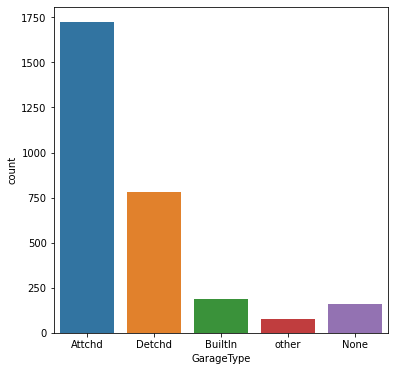

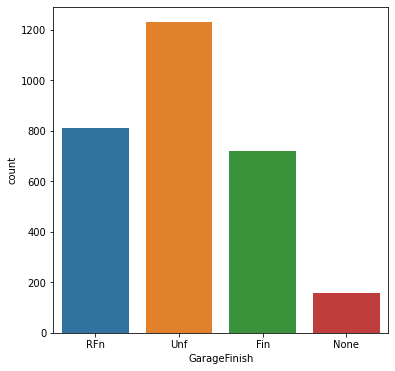

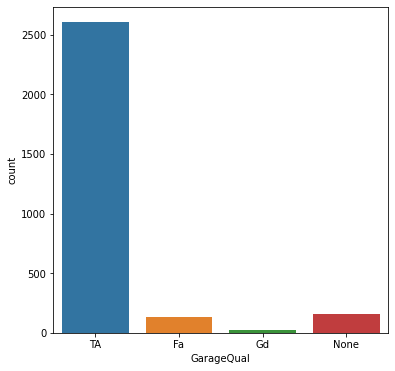

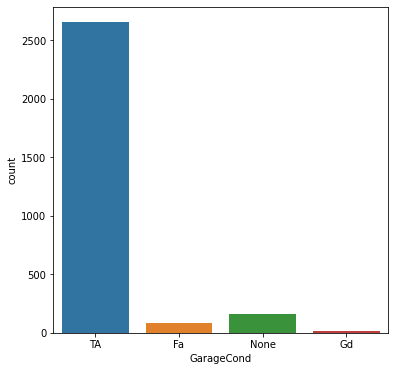

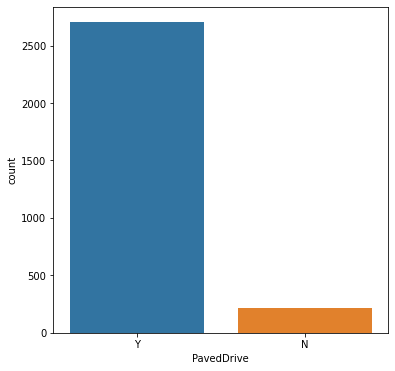

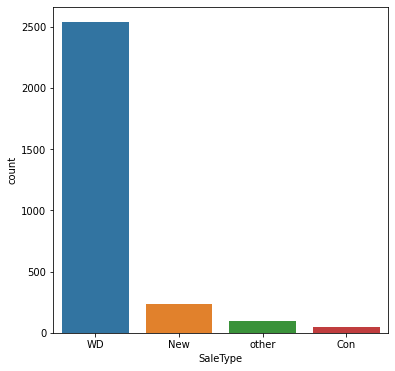

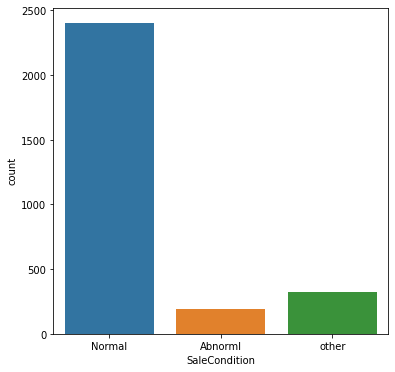

In [33]:
def cat_feature(data, cols):
  for col in cols:
    fig = plt.figure(figsize = (6,6))
    ax = fig.gca()
    sns.countplot(x = col, data = data)
    plt.show()

cat_feature(data, cols_cat)

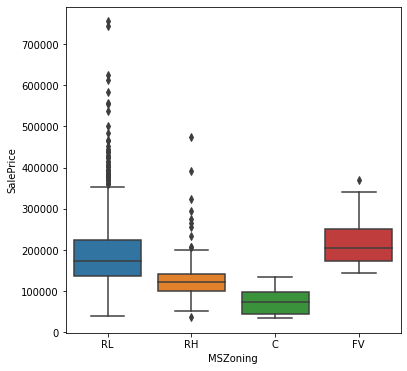

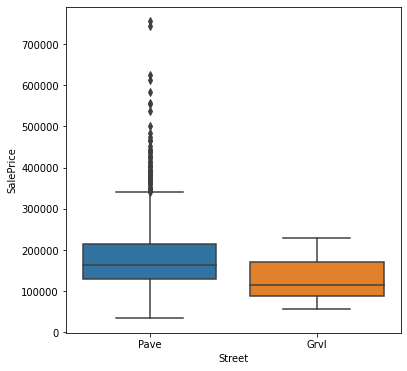

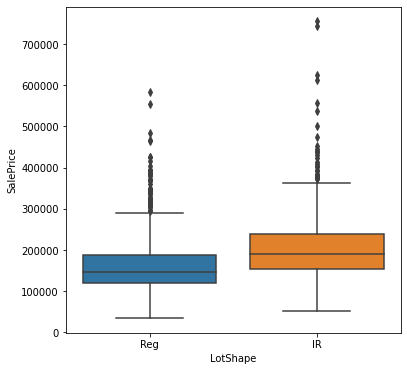

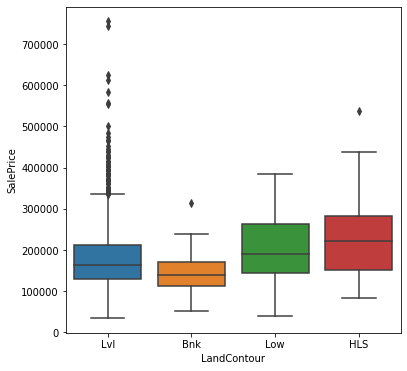

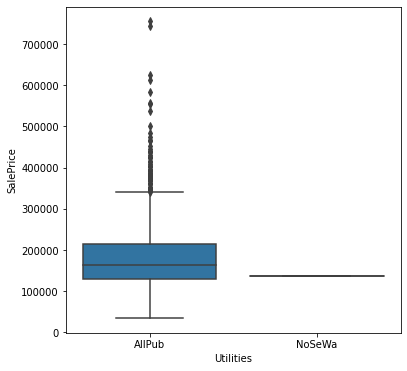

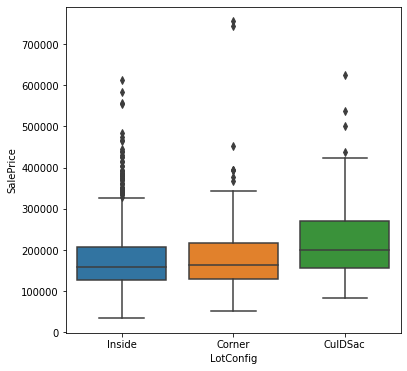

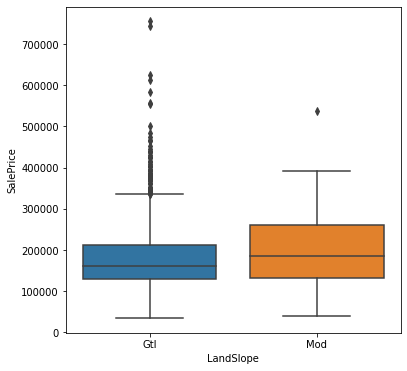

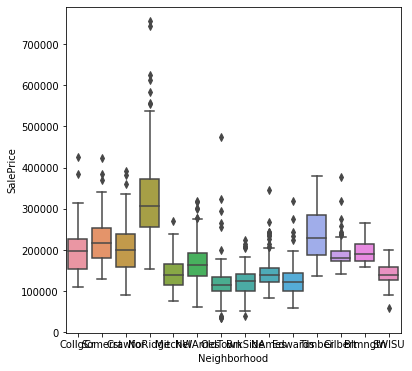

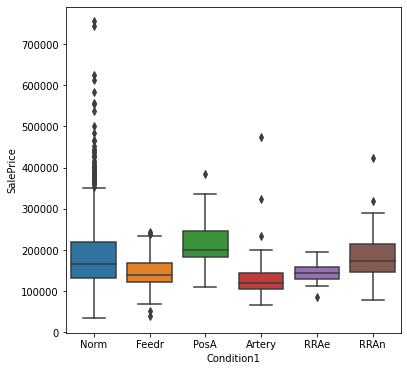

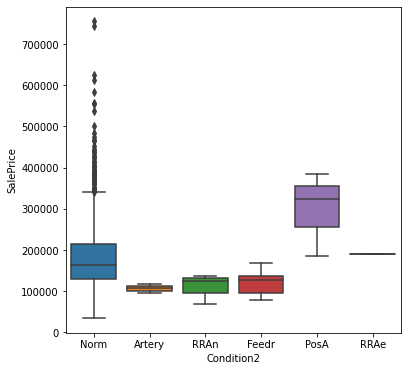

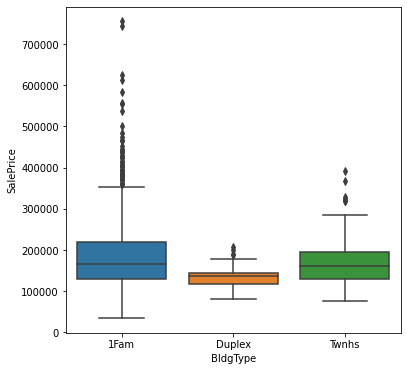

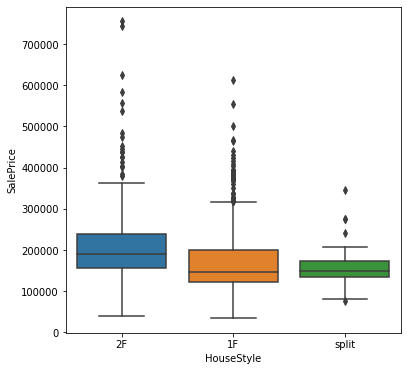

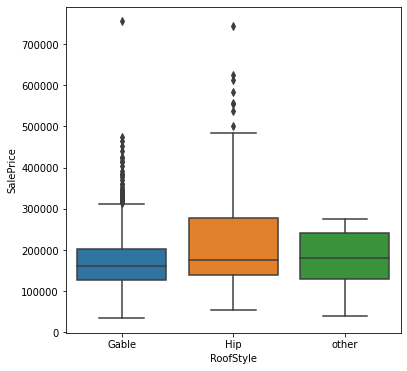

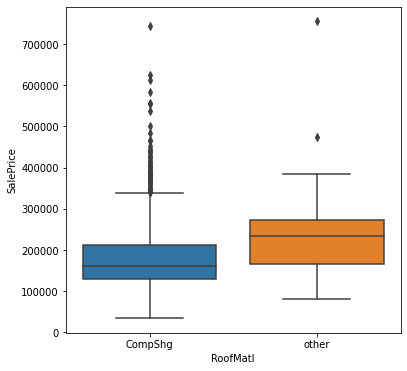

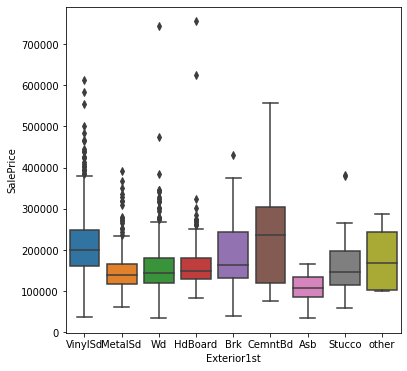

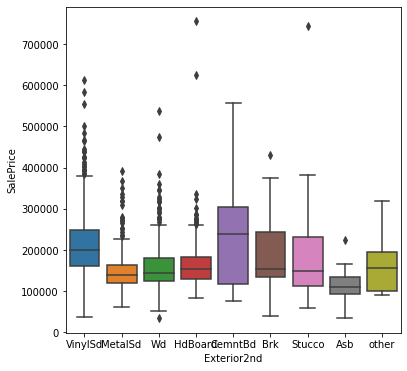

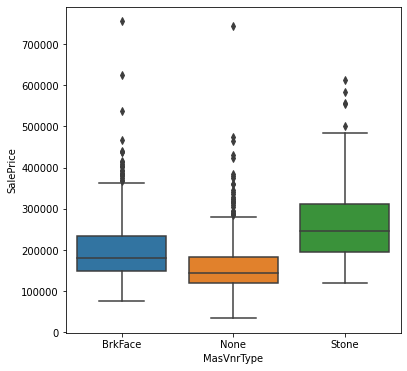

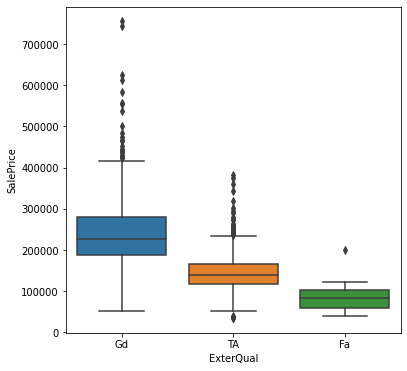

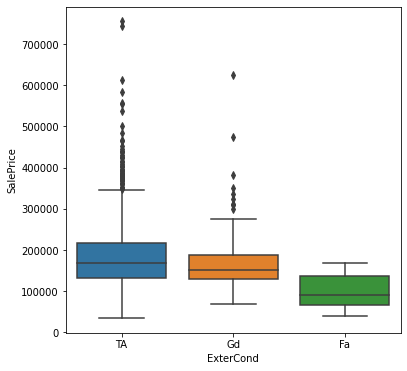

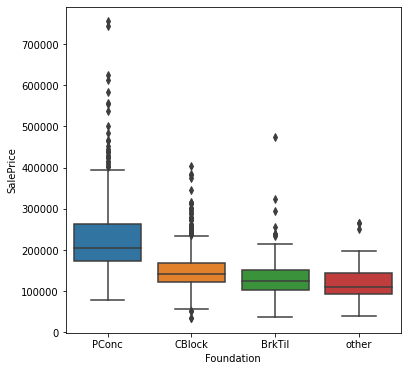

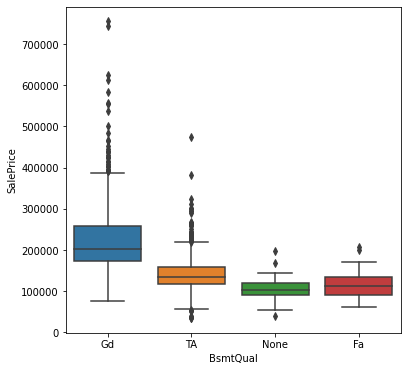

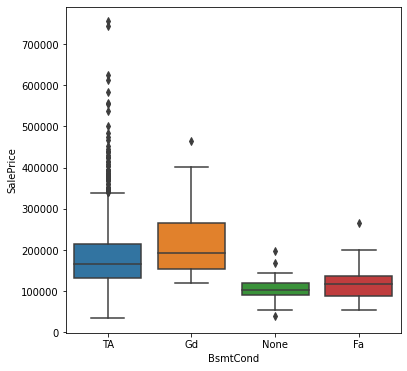

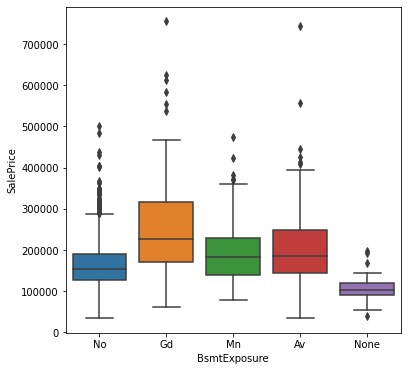

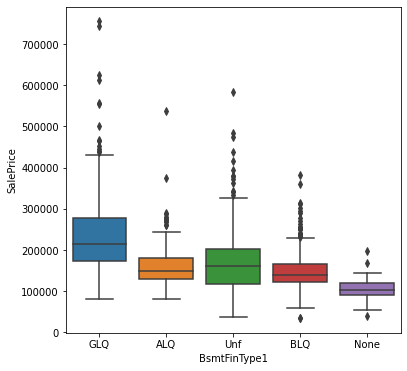

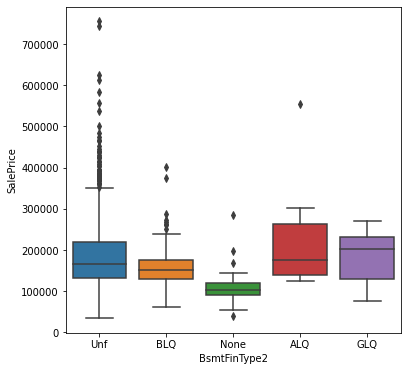

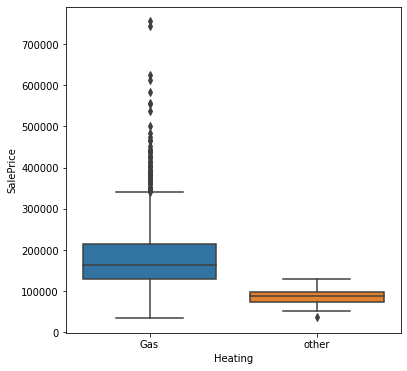

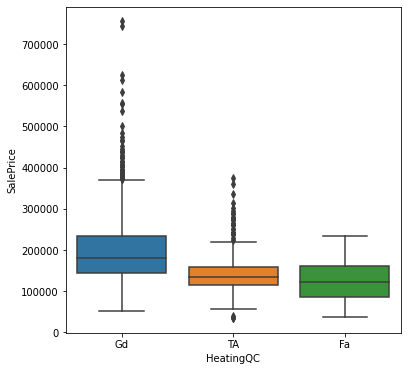

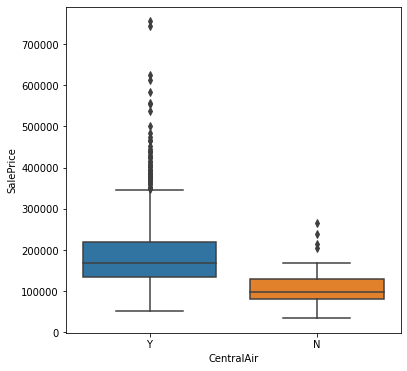

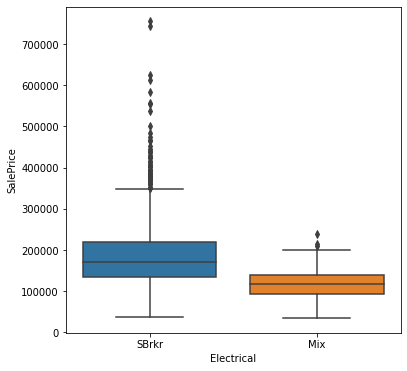

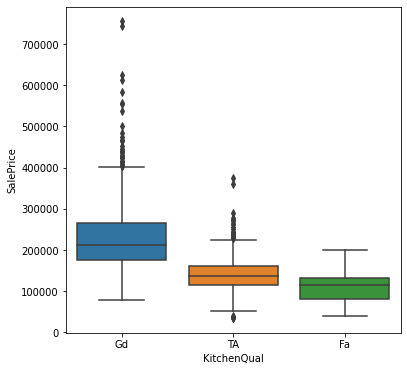

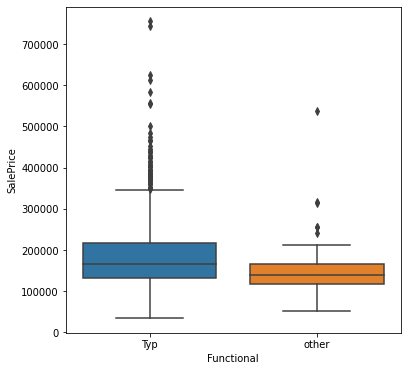

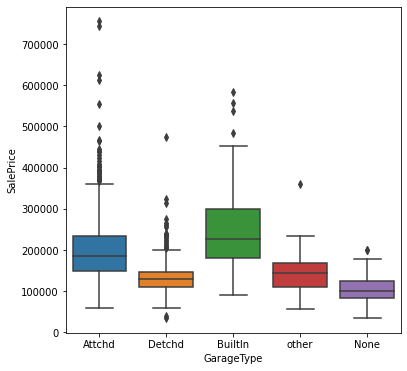

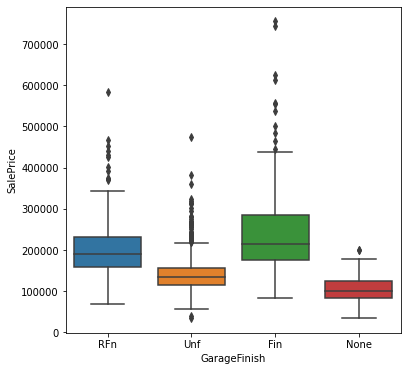

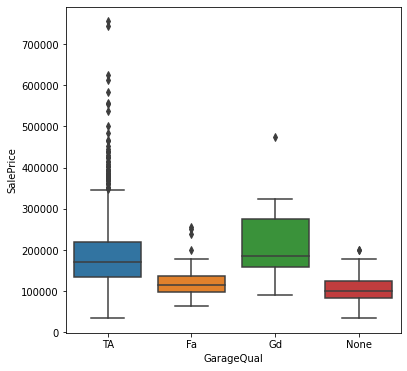

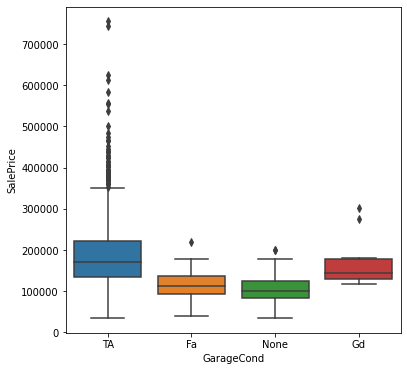

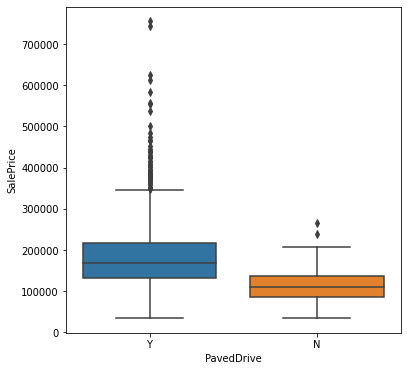

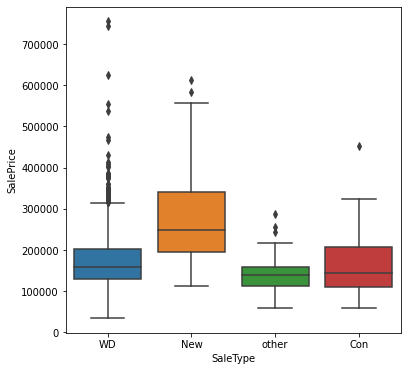

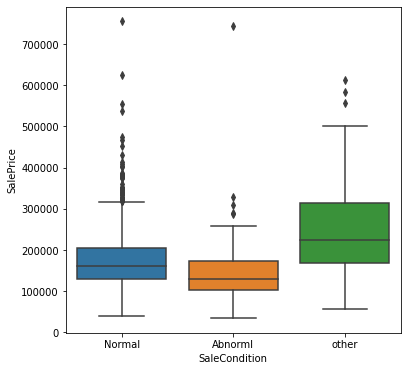

In [34]:
def rela_num_cat(data, cols, label):
  for col in cols:
    fig = plt.figure(figsize = (6,6))
    ax = fig.gca()
    sns.boxplot(x = col, y = label, data = data)
    plt.show()

train_data = data[:1460]
rela_num_cat(train_data, cols_cat, train_data['SalePrice'])

In [0]:
data.loc[data['1stFlrSF'] > 2500, '1stFlrSF'] = data['1stFlrSF'].mean()
data.loc[data['2ndFlrSF'] > 2500, '2ndFlrSF'] = data['2ndFlrSF'].mean()
data.loc[data['BsmtFinSF1'] > 2000, 'BsmtFinSF1'] = data['BsmtFinSF1'].mean()
data.loc[data['BsmtFinSF2'] > 1000, 'BsmtFinSF2'] = data['BsmtFinSF2'].mean()
data.loc[data['BsmtUnfSF'] > 2000, 'BsmtUnfSF'] = data['BsmtUnfSF'].mean()
data.loc[data['EnclosedPorch'] > 300, 'EnclosedPorch'] = data['EnclosedPorch'].mean()
data.loc[data['GarageArea'] > 1200, 'GarageArea'] = data['GarageArea'].mean()
data.loc[data['GarageYrBlt'] > 2020, 'GarageYrBlt'] = data['GarageYrBlt'].mode()
data.loc[data['GrLivArea'] > 2020, 'GrLivArea'] = data['GrLivArea'].mean()
data.loc[data['LotArea'] > 50000, 'LotArea'] = data['LotArea'].mean()
data.loc[data['LotFrontage'] > 150, 'LotFrontage'] = data['LotFrontage'].mean()
data.loc[data['LowQualFinSF'] > 500, 'LowQualFinSF'] = data['LowQualFinSF'].mean()
data.loc[data['MasVnrArea'] > 750, 'MasVnrArea'] = data['MasVnrArea'].mean()
data.loc[data['MiscVal'] > 5000, 'MiscVal'] = data['MiscVal'].mean()
data.loc[data['OpenPorchSF'] > 300, 'OpenPorchSF'] = data['OpenPorchSF'].mean()
data.loc[data['ScreenPorch'] > 250, 'ScreenPorch'] = data['ScreenPorch'].mean()
data.loc[data['TotalBsmtSF'] > 2500, 'TotalBsmtSF'] = data['TotalBsmtSF'].mean()
data.loc[data['WoodDeckSF'] > 600, 'WoodDeckSF'] = data['WoodDeckSF'].mean()
data.loc[data['totalSF'] > 10000, 'totalSF'] = data['totalSF'].mean()
#data.loc[data['SalePrice'] > 500000, 'SalePrice'] = data['SalePrice'].mean()


In [0]:
#print(data.shape)
#data['SalePrice'].describe()
#data_t = data.loc[data['SalePrice'] < 700, data.columns]
#print(data_t.shape)

In [0]:
data['1stFlrSF'] = np.log1p(data['1stFlrSF'])
data['BsmtFinSF1'] = np.sqrt(data['BsmtFinSF1'])
data['BsmtFinSF2'] = np.log1p(data['BsmtFinSF2'])
data['BsmtUnfSF'] = np.sqrt(data['BsmtUnfSF'])
data['EnclosedPorch'] = np.log1p(data['EnclosedPorch'])
data['GarageYrBlt'] = np.sqrt(data['GarageYrBlt'])
data['GrLivArea'] = np.sqrt(data['GrLivArea'])
data['LotArea'] = np.sqrt(data['LotArea'])
data['LotFrontage'] = np.log1p(data['LotFrontage'])
data['LowQualFinSF'] = np.log1p(data['LowQualFinSF'])
data['MasVnrArea'] = np.sqrt(data['MasVnrArea'])
data['MiscVal'] = np.sqrt(data['MiscVal'])
data['OpenPorchSF'] = np.sqrt(data['OpenPorchSF'])
data['PoolArea'] = np.log1p(data['PoolArea'])
data['SalePrice'] = np.sqrt(data['SalePrice'])
data['ScreenPorch'] = np.log1p(data['ScreenPorch'])
data['TotalBsmtSF'] = np.log1p(data['TotalBsmtSF'])
data['WoodDeckSF'] = np.sqrt(data['WoodDeckSF'])
data['totalSF'] = np.sqrt(data['totalSF'])


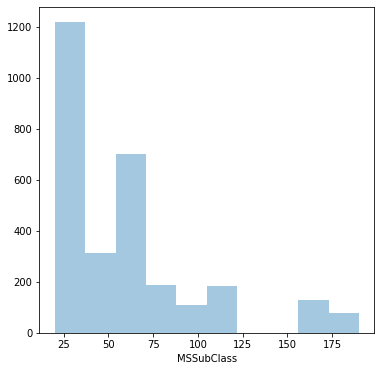

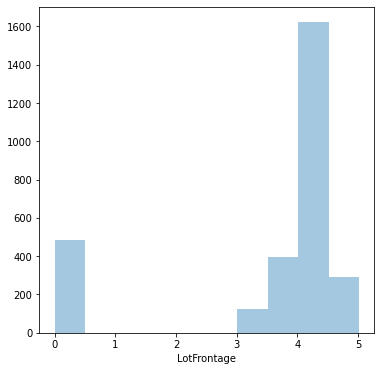

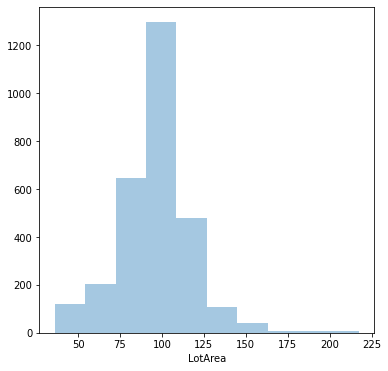

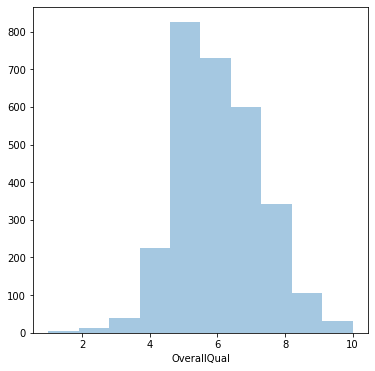

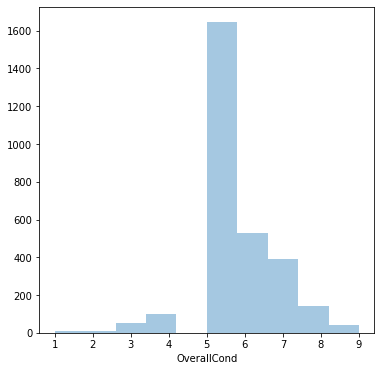

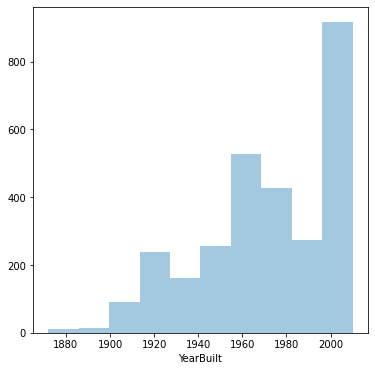

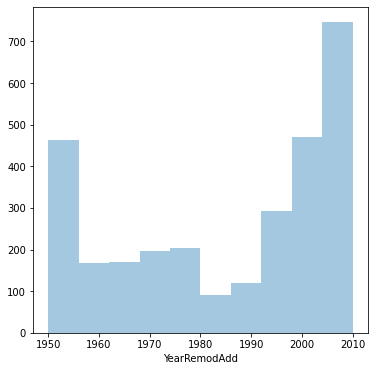

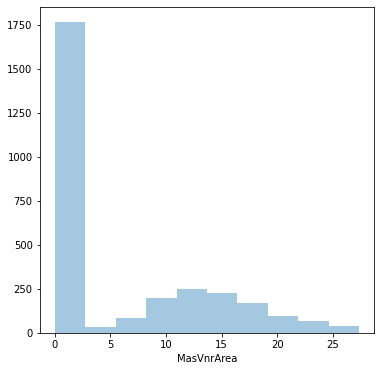

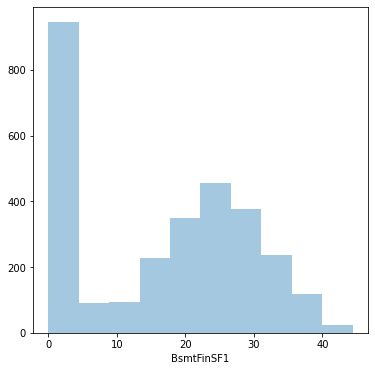

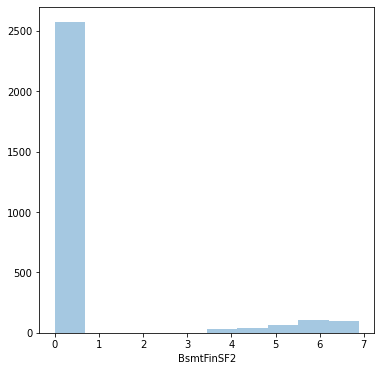

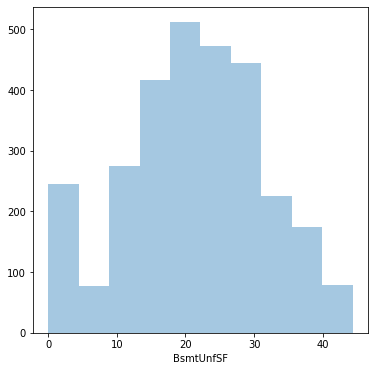

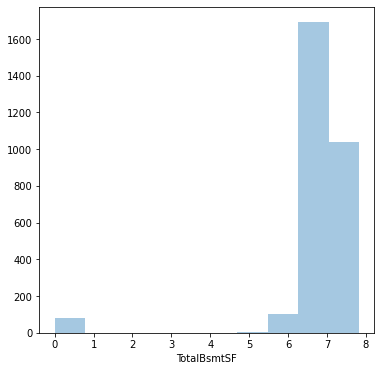

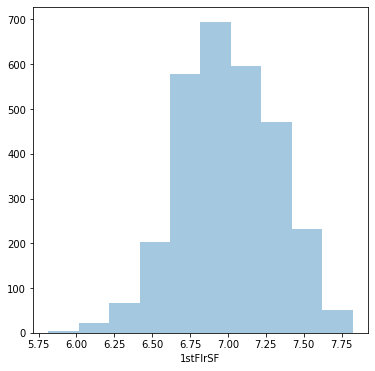

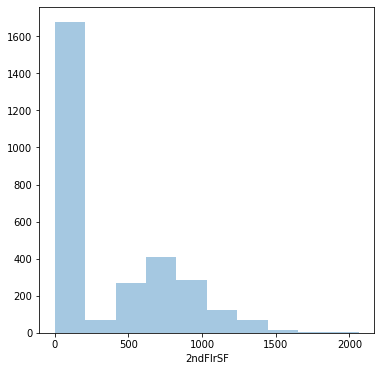

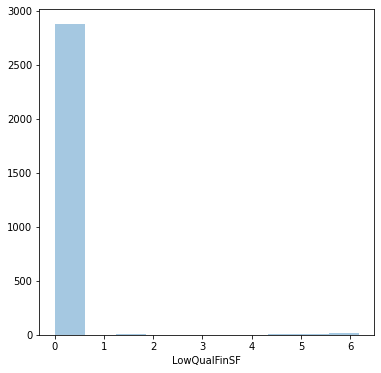

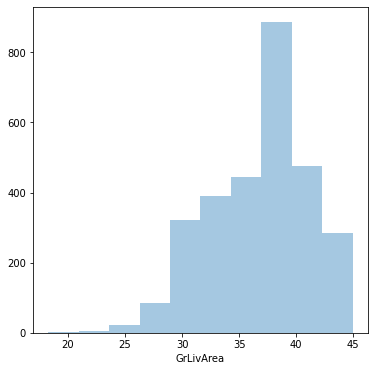

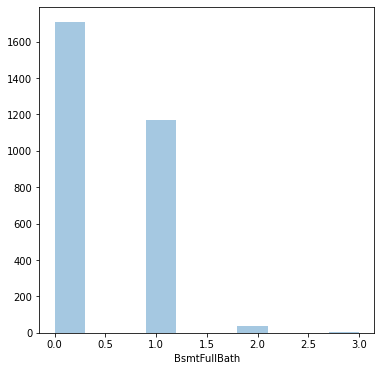

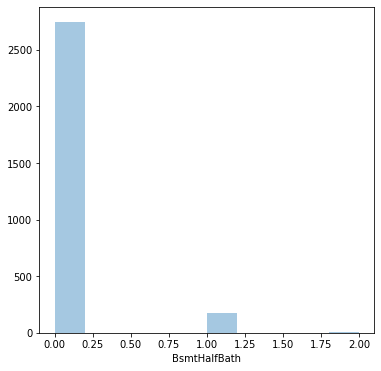

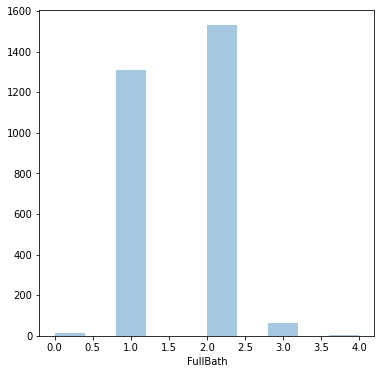

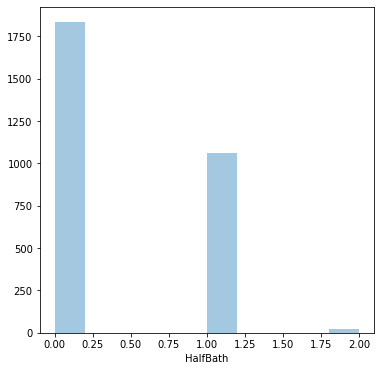

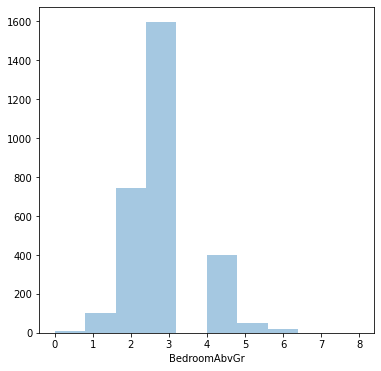

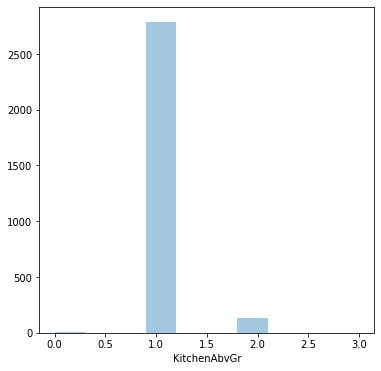

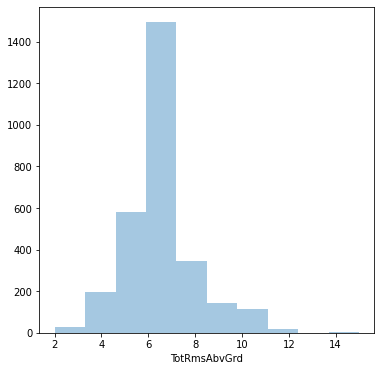

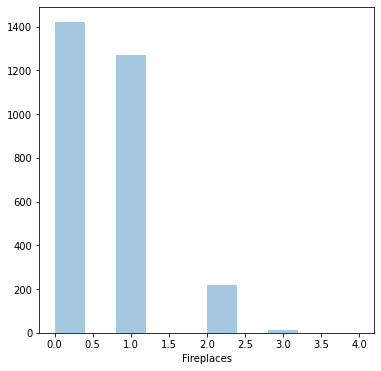

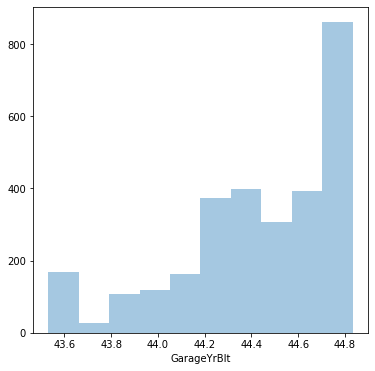

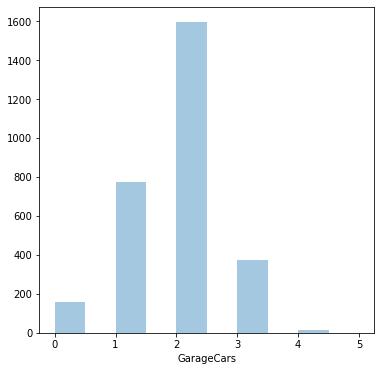

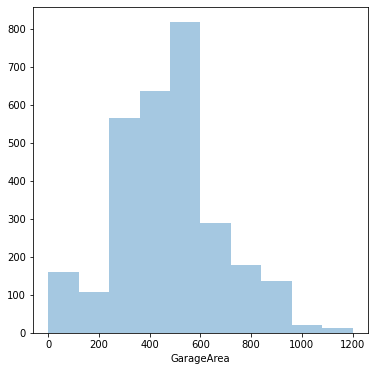

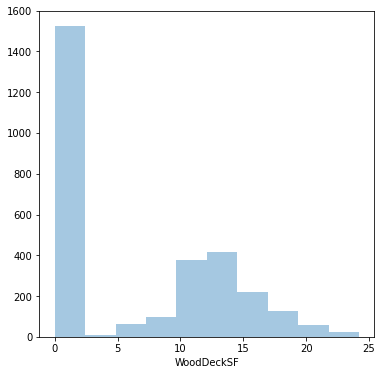

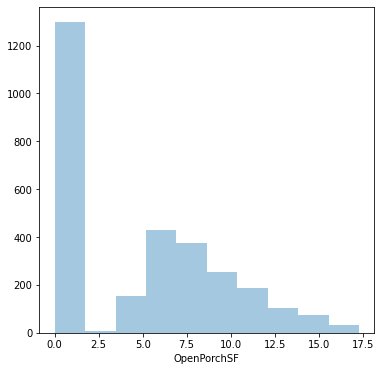

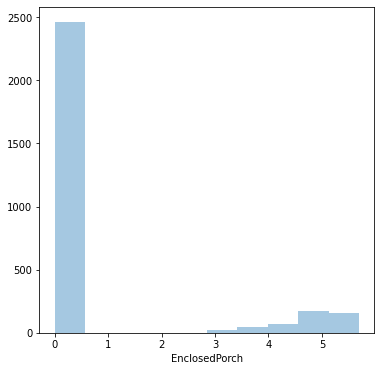

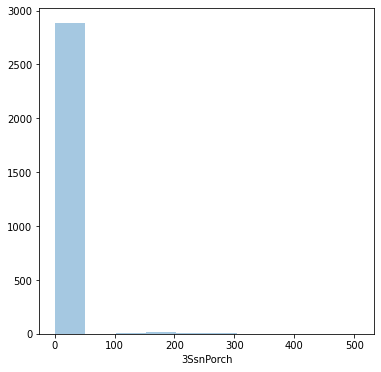

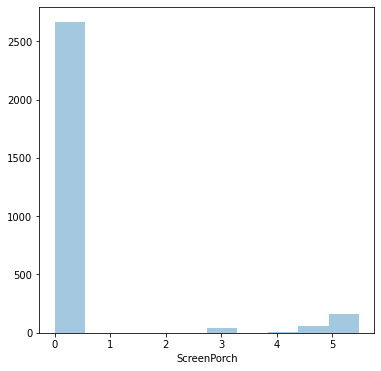

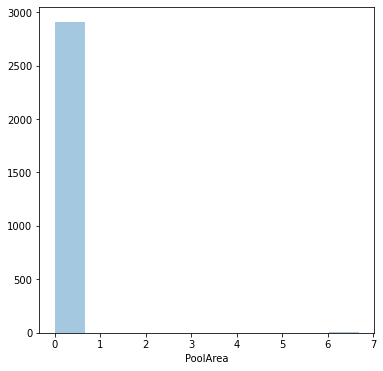

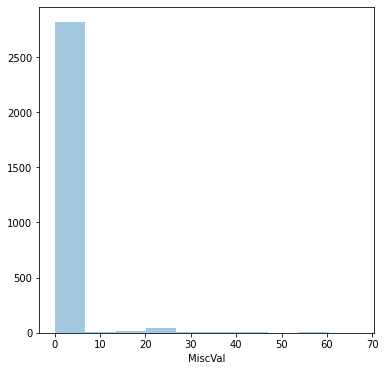

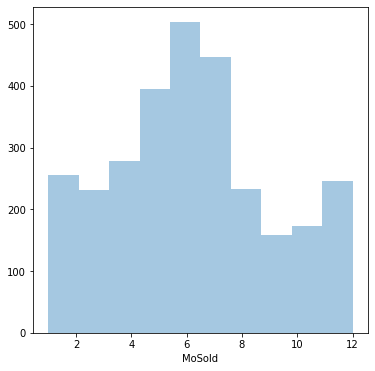

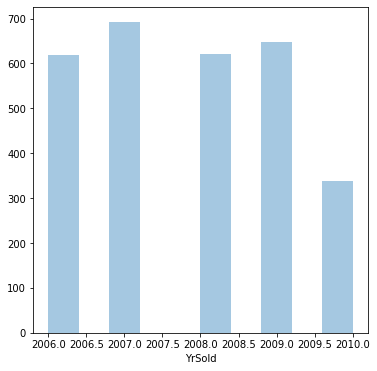

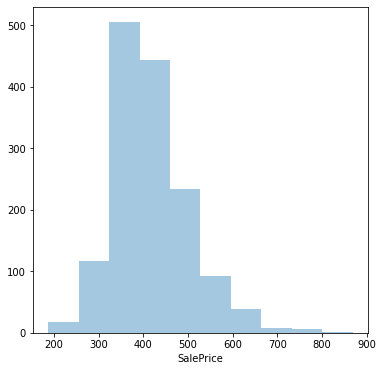

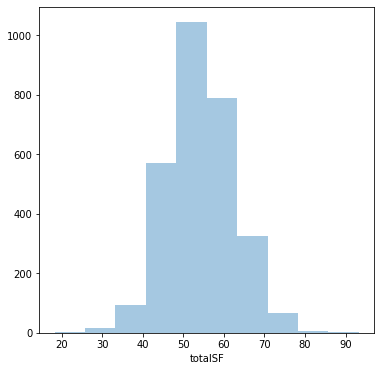

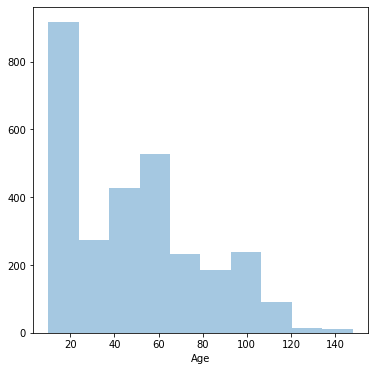

In [38]:
#distrbution of numerical features
def num_feature(data, cols):
  for col in cols:
    fig = plt.figure(figsize = (6,6))
    ax = fig.gca()
    sns.distplot(data[col], bins = 10, kde = False)
    plt.show()

num_feature(data, cols_num)

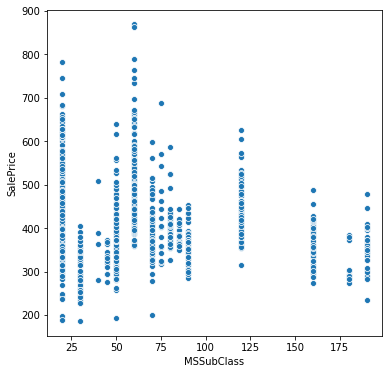

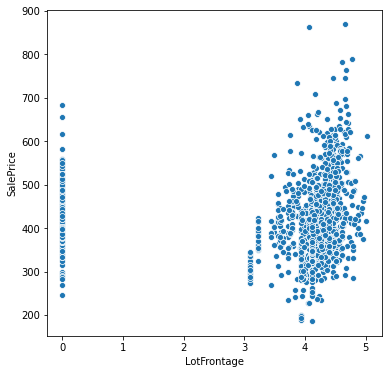

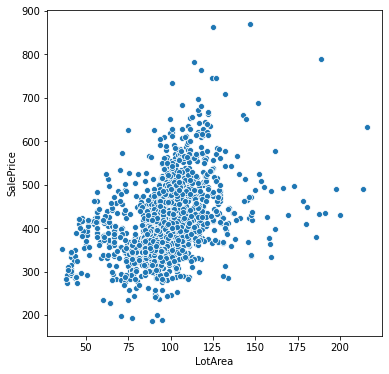

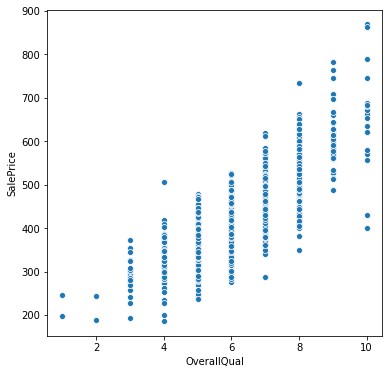

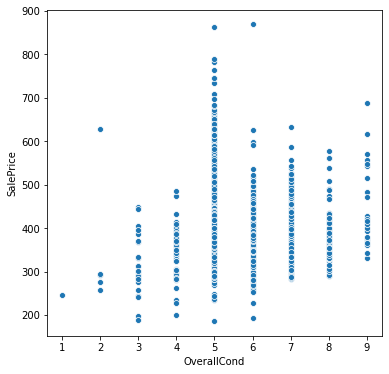

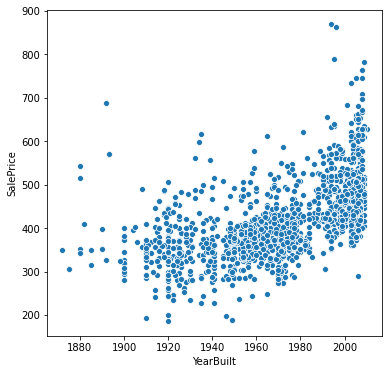

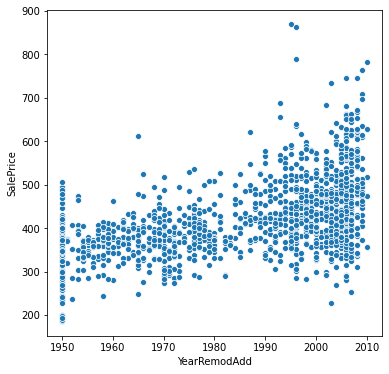

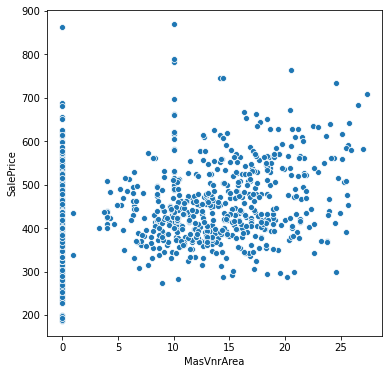

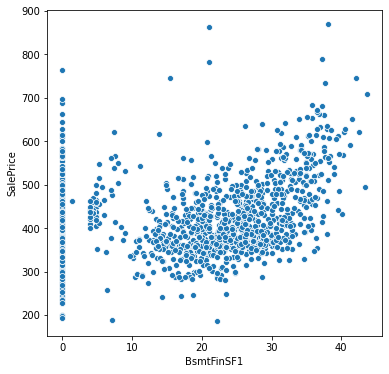

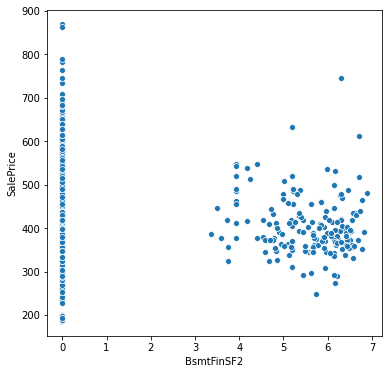

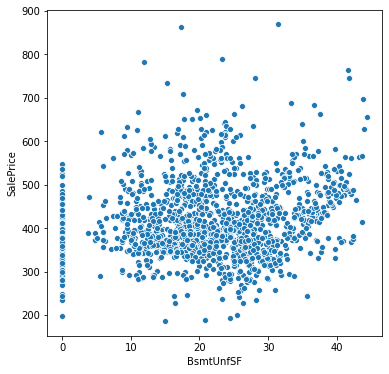

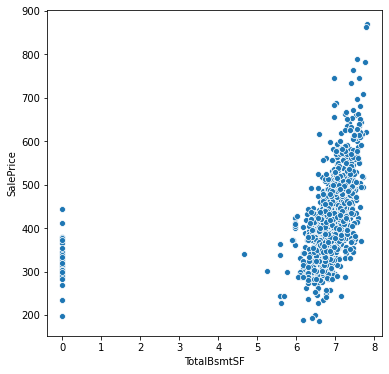

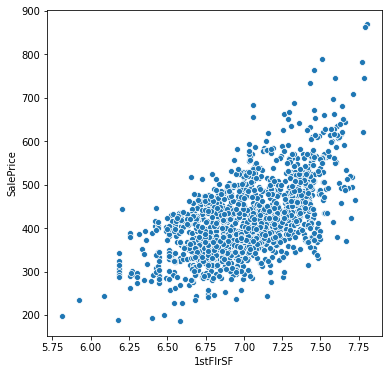

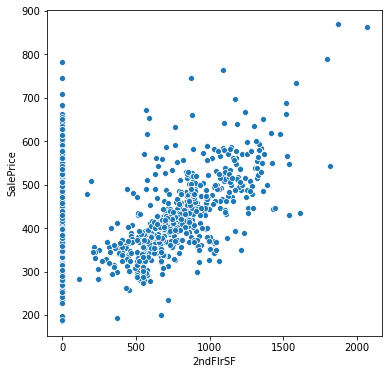

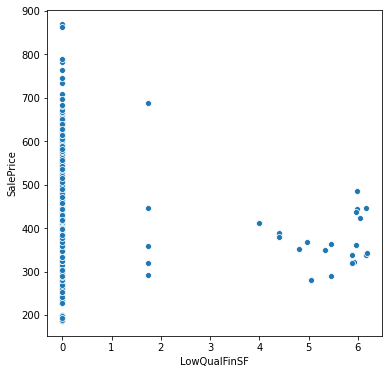

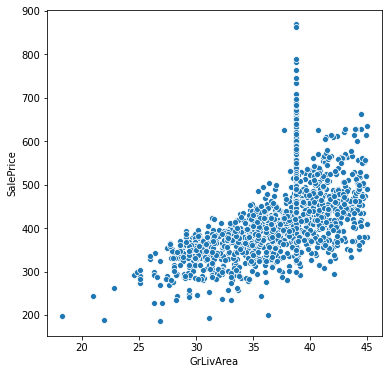

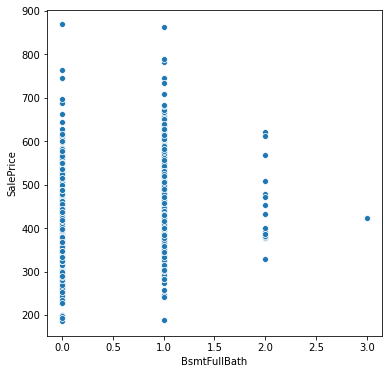

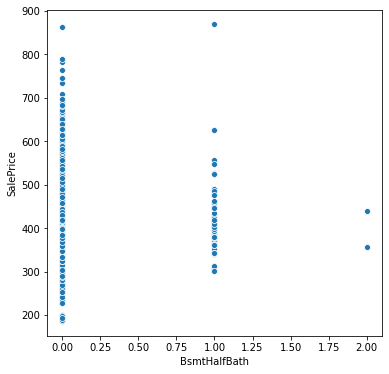

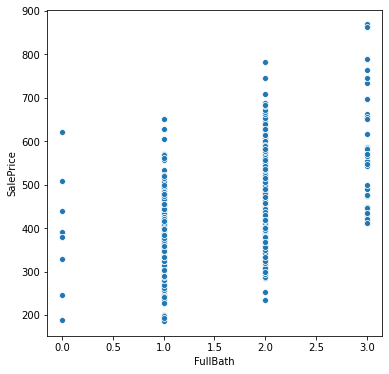

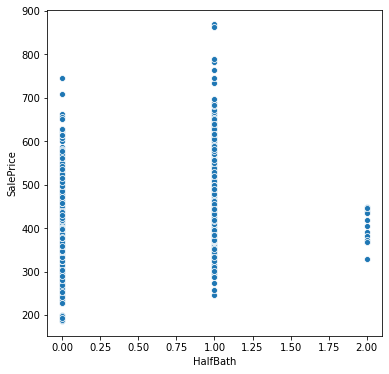

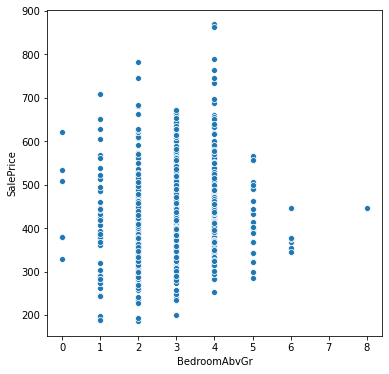

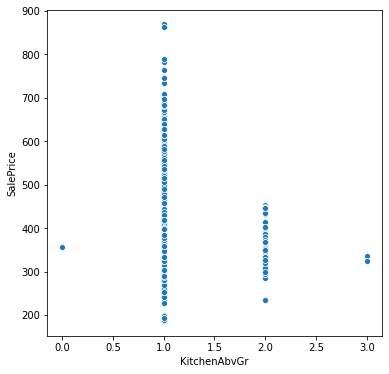

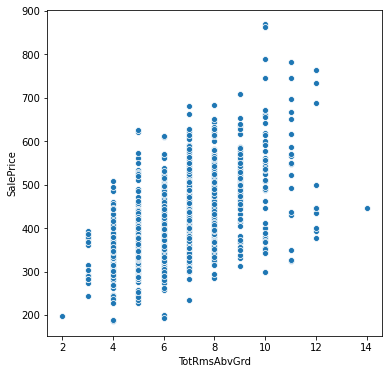

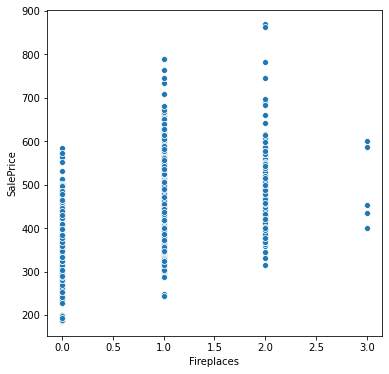

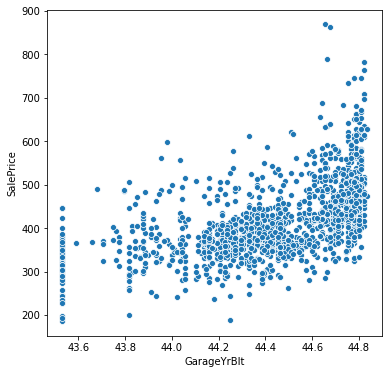

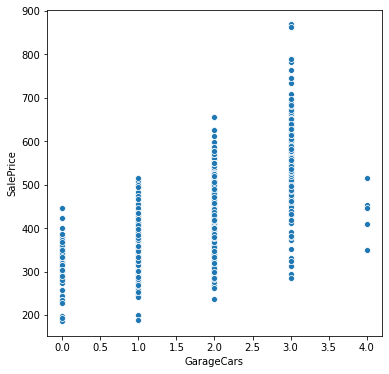

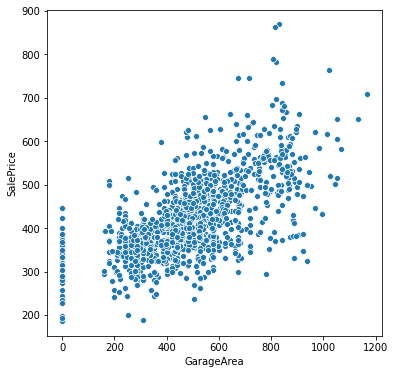

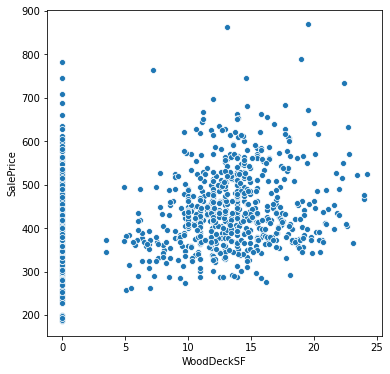

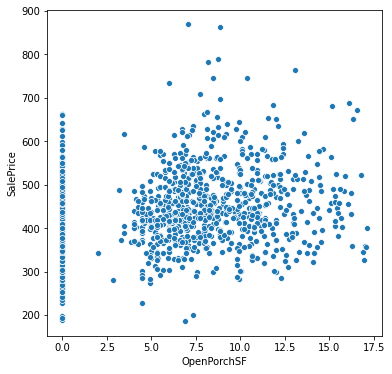

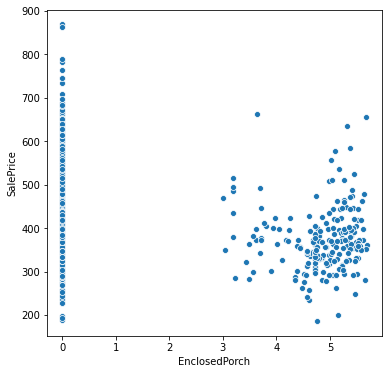

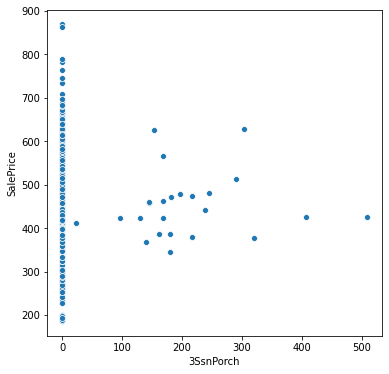

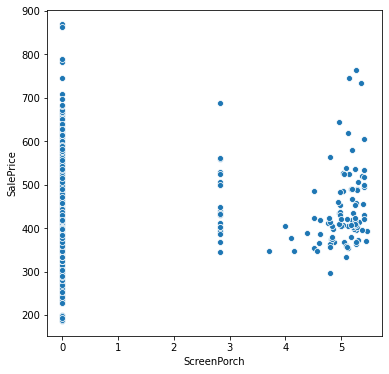

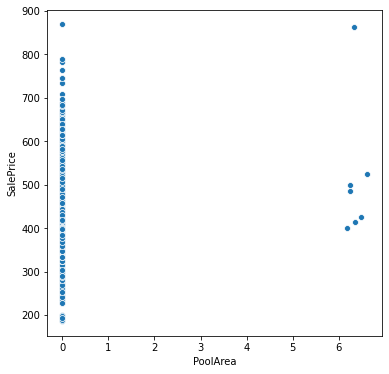

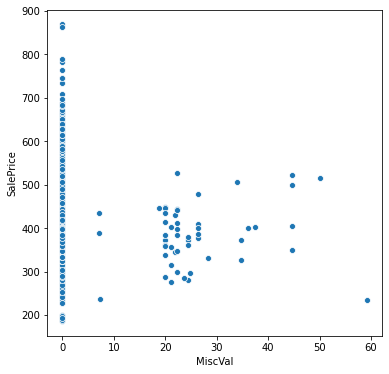

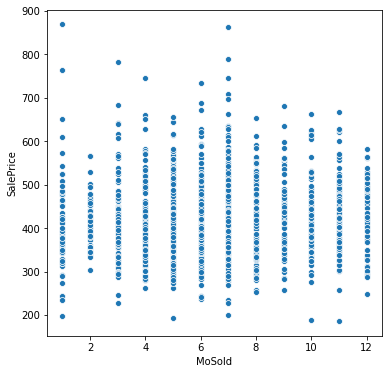

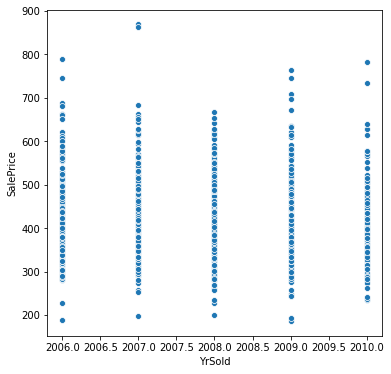

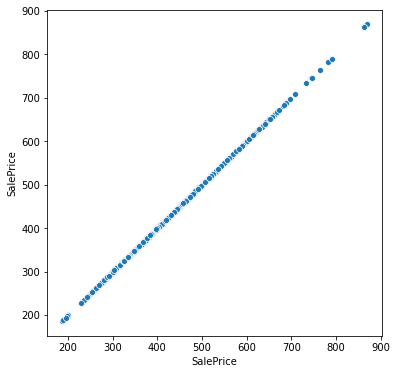

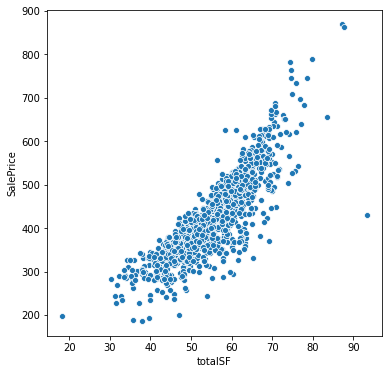

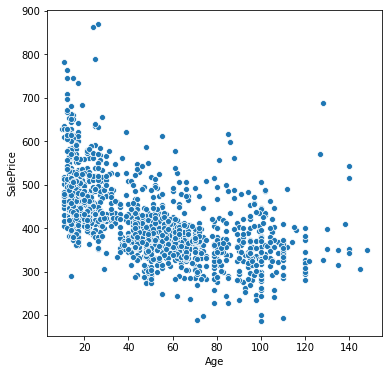

In [39]:
def rela_num_num(data, cols, label):
  for col in cols:
    fig = plt.figure(figsize = (6,6))
    ax = fig.gca()
    #sns.jointplot(x = col, y = label, data = data, kind = 'reg', color = 'g')
    sns.scatterplot(x = col, y = label, data = data)
    plt.show()

train_data = data[:1460]
rela_num_num(train_data, cols_num, train_data['SalePrice'])

In [0]:
#data.columns
#data.drop(columns = ['3SsnPorch', 'BsmtHalfBath', 'BsmtFinSF2', 'BsmtHalfBath', 'LowQualFinSF',
#                   'MiscVal', 'MoSold', 'PoolArea', 'YrSold'], inplace = True)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols_cat:
  le.fit(data[col])
  data[col] = le.transform(data[col]).astype('object')

data = pd.get_dummies(data)

In [41]:
print(data.shape)
#data['SalePrice'].describe()
#data_t = data.loc[data['SalePrice'] < 700, data.columns]
#print(data_t.shape)

(2919, 189)


In [42]:
train = data[:1460]
label = train['SalePrice'].values.reshape(-1, 1)

train.drop(columns = 'SalePrice', inplace = True)

test = data[1460:]
test.drop(columns = 'SalePrice', inplace = True)

print(train.shape)
print(test.shape)
print(label.shape)

(1460, 188)
(1459, 188)
(1460, 1)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train, label, test_size = 0.2)

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers

Using TensorFlow backend.


In [58]:
model = Sequential()

model.add(Dense(units = 512, input_shape = (188,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

for i in range(0, 5):
  model.add(Dense(units = 256, kernel_regularizer = regularizers.l2(0.1)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

model.add(Dense(units = 1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse', 'mae'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               96768     
_________________________________________________________________
batch_normalization_26 (Batc (None, 512)               2048      
_________________________________________________________________
activation_26 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_27 (Batc (None, 256)               1024      
_________________________________________________________________
activation_27 (Activation)   (None, 256)              

In [0]:
reduce_LR = ReduceLROnPlateau(monitor = 'val_loss', patience = 10, verbose = 1, min_lr = 0)


In [60]:
epochs = 200
batch = 64

train_history = model.fit(x_train, y_train, verbose = 1, epochs = epochs, batch_size = batch,
                    validation_data = [x_val, y_val], callbacks = [reduce_LR])

Train on 1168 samples, validate on 292 samples
Epoch 1/200
1168/1168 [==============================] - 1s 1ms/step - loss: 180745.4865 - mse: 180608.6562 - mae: 416.4457 - val_loss: 179124.6811 - val_mse: 178987.3906 - val_mae: 413.9338
Epoch 2/200
1168/1168 [==============================] - 0s 189us/step - loss: 178554.3699 - mse: 178416.7344 - mae: 414.1907 - val_loss: 177794.3581 - val_mse: 177656.3125 - val_mae: 412.7874
Epoch 3/200
1168/1168 [==============================] - 0s 198us/step - loss: 175954.8604 - mse: 175816.5000 - mae: 411.8212 - val_loss: 170989.2185 - val_mse: 170850.4688 - val_mae: 405.9837
Epoch 4/200
1168/1168 [==============================] - 0s 170us/step - loss: 172966.5631 - mse: 172827.5156 - mae: 408.8163 - val_loss: 161396.0923 - val_mse: 161256.7188 - val_mae: 395.8122
Epoch 5/200
1168/1168 [==============================] - 0s 179us/step - loss: 169879.1017 - mse: 169739.4688 - mae: 405.3986 - val_loss: 154176.9936 - val_mse: 154037.0938 - val_mae:

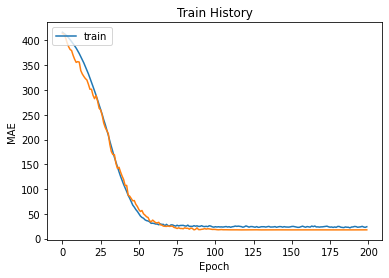

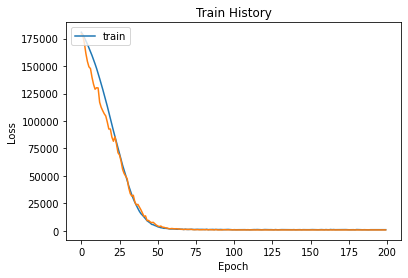

In [63]:

def show_train_history_acc(train_history):
    plt.plot(train_history.history['mae'])
    plt.plot(train_history.history['val_mae'])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend(["train"], loc="upper left")
    plt.show()

def show_train_history_loss(train_history):
    plt.plot(train_history.history["loss"])
    plt.plot(train_history.history["val_loss"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train"], loc="upper left")
    plt.show()

show_train_history_acc(train_history)    
show_train_history_loss(train_history)

In [0]:
prediction = model.predict(test)
prediction = np.square(prediction).round(0).astype('int32')

sub = pd.read_csv('/content/drive/My Drive/house_prices/sample_submission.csv')

sub['SalePrice'] = prediction
sub.set_index('Id', inplace = True)

sub.head(20)

sub.to_csv('sample_submission.csv')

from google.colab import files

files.download('sample_submission.csv')